### Parse and plot the top 100 data from RIO

In [7]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

import sys
sys.path.append('../utils')
import blizzcolors
import rio

import importlib
importlib.reload(blizzcolors)
importlib.reload(rio)

pd.options.display.max_columns = 100

In [24]:
colors = blizzcolors.BlizzColors()

In [698]:
import requests
import time
import pickle
from collections import OrderedDict

#### Open up RIO json pickles and parse them into a pandas df

In [8]:
legion_data_raw = pickle.load(
    open('data/fixed_legion_top100_runs_every_region_raw_resp.pkl', 'rb')
    )

bfa_data_raw = pickle.load(
    open('data/fixed_bfa_top100_runs_every_region_raw_resp.pkl', 'rb')
    )

In [9]:
importlib.reload(rio)
t0 = time.time()
def parse_data(raw_response_list):
    data = []
    for response in raw_response_list.values():
        parser = rio.RioResponseParser(response)
        runs = parser.unroll()
        [data.append(run) for run in runs]
    return pd.DataFrame(data)

legion_df = parse_data(legion_data_raw)
bfa_df = parse_data(bfa_data_raw)
print(time.time() - t0)

<Response [504]>
<Response [504]>
12.77333402633667


In [11]:
df = pd.concat([legion_df, bfa_df])
df.head()

,id,rank,season,dungeon,region,dps_mage,healer_paladin,dps_druid_balance,tank_druid,dps_death_knight,dps_hunter_marksmanship,tank_monk,healer_druid,dps_demon_hunter,dps_rogue,dps_warlock,healer_priest_discipline,tank_warrior,dps_paladin,tank_paladin,dps_warrior,dps_hunter_beast_mastery,dps_shaman_elemental,dps_priest,dps_shaman_restoration,dps_monk,healer_shaman,tank_demon_hunter,dps_shaman_enhancement,healer_monk,dps_druid_feral,tank_death_knight,healer_priest_shadow,dps_hunter_survival,dps_druid_guardian,dps_druid_restoration,healer_priest_holy,healer_rogue,tank_warlock,tank_hunter,healer_death_knight
0,5079073,1,season-7.2.0,BRH,us,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5222177,2,season-7.2.0,BRH,us,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5178008,3,season-7.2.0,BRH,us,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5185105,4,season-7.2.0,BRH,us,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5186312,5,season-7.2.0,BRH,us,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Get class count vs seasons

In [12]:
# main seasons
seasons = [
    'season-7.2.0', 'season-7.2.5', 'season-7.3.0', 'season-7.3.2',
    'season-bfa-1', 'season-bfa-2', 'season-bfa-3', 'season-bfa-4'
    ]

# count the total number of chracter specs across the main seasons
gdf = df[df['season'].isin(seasons)].groupby('season').sum().drop(['id', 'rank'], axis=1)

gdf.T.sort_index(ascending=False)

season,season-7.2.0,season-7.2.5,season-7.3.0,season-7.3.2,season-bfa-1,season-bfa-2,season-bfa-3,season-bfa-4
tank_warrior,488.0,314.0,158.0,66.0,356.0,3446.0,1332.0,2950.0
tank_warlock,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tank_paladin,939.0,580.0,995.0,454.0,206.0,246.0,189.0,139.0
tank_monk,496.0,376.0,332.0,37.0,475.0,56.0,2221.0,775.0
tank_hunter,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
tank_druid,1158.0,499.0,282.0,10.0,57.0,17.0,39.0,140.0
tank_demon_hunter,766.0,1194.0,1301.0,1401.0,355.0,17.0,119.0,609.0
tank_death_knight,944.0,1826.0,2121.0,3268.0,2574.0,217.0,100.0,187.0
healer_shaman,614.0,570.0,313.0,47.0,17.0,8.0,25.0,77.0
healer_rogue,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Deal with errors
There is a small number of erros, with specs assigned to roles that they cannot perform. For example, **dps_druid_resto** shows up in the dataframe. Restoration druids can not fill dps roles. This could be a result of edge cases (double healer run), where one of the healers, a resto druid in this case, is assigned to a dps slot by the Rio parser.<br>

Crippled group comps like double healer, however, are very unlikely to be timing region top-100 keys. Additionally, these errors primarily occur in seasons 1 and 2 of Legion (early in Rio's history) and plague hybrid specs (druids, and in additon priests) who are liable to switch specs frequently. This leads me to belive that something was wrong on Rio's end or with Blizzard's API in the early days when it came to parsing roster data.<br>

To deal with these errors, we can remove misclassified samples from the data. That would skew the ratios for other classes, especially for categories where priests and druids are involved. So, I'd rather go through each mistake by hand, and distribute misclassified samples proportionally among valid specs.<br>

For example, there are 10 dps mistakenly marked as **resto druid** in a season. Distribute these 10 among **balance druid** and **feral druid** according to the ratio between the two valid specs. So, if 80% of dps druids are balace and 20% feral, add 8 to balance category, and 2 to feral. Then set **dps_druid_resto** cell to 0, and remove from set.

PS<br>
I can also design a more intricate parser on my end to catch errors early, but the time cost of doing it is too high compared to just fixing it by hand now (~10 minutes).


In [13]:
# invalid data
invalid_columns = ['tank_hunter',
                   'healer_rogue',
                   'healer_priest_shadow',
                   'healer_death_knight',
                   'dps_shaman_restoration',
                   'dps_druid_restoration',
                   'dps_druid_guardian']

gdf[invalid_columns]

,tank_hunter,healer_rogue,healer_priest_shadow,healer_death_knight,dps_shaman_restoration,dps_druid_restoration,dps_druid_guardian
season,,,,,,,
season-7.2.0,2.0,12.0,182.0,1.0,128.0,57.0,71.0
season-7.2.5,3.0,0.0,136.0,0.0,36.0,170.0,95.0
season-7.3.0,0.0,0.0,141.0,0.0,44.0,207.0,78.0
season-7.3.2,0.0,0.0,0.0,0.0,0.0,1.0,0.0
season-bfa-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
season-bfa-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
season-bfa-3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
season-bfa-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
def distribute(df, source_spec, target_specs):
    """
    Redistribute obviously erroneous spec tokens to appropriate specs
    """
    if len(target_specs) == 1:
        df[target_specs[0]] += df[source_spec]
    else:
        sum_targets = df[target_specs].sum(axis=1)
        for target_spec in target_specs:
            pct_spec = df[target_spec]/sum_targets
            df[target_spec] += df[source_spec] * pct_spec 
    df[source_spec] = 0

In [15]:
distribute(gdf, 'healer_rogue', ['dps_rogue'])
distribute(gdf, 'tank_hunter', ['dps_hunter_survival',
                                'dps_hunter_marksmanship',
                                'dps_hunter_beast_mastery'
                               ])
distribute(gdf, 'healer_priest_shadow', ['healer_priest_holy',
                                         'healer_priest_discipline'])
distribute(gdf, 'dps_shaman_restoration', ['dps_shaman_elemental',
                                           'dps_shaman_enhancement'])
distribute(gdf, 'dps_druid_restoration', ['dps_druid_feral',
                                          'dps_druid_balance'])
distribute(gdf, 'dps_druid_guardian', ['dps_druid_feral',
                                       'dps_druid_balance'])
gdf['healer_death_knight'] = 0 # it's just 1 sample

gdf = gdf.round()

In [16]:
# merge hunters into a single column    
gdf['dps_hunter_mmbm'] = gdf['dps_hunter_beast_mastery'] + gdf['dps_hunter_marksmanship']
gdf.drop(['dps_hunter_marksmanship', 'dps_hunter_beast_mastery'], axis=1, inplace=True)

#### Plot Healer data

In [17]:
healers = ['healer_%s' % s for s in ['druid', 'paladin', 'shaman', 'monk',
                                     'priest_holy', 'priest_discipline']]
print(healers)

['healer_druid', 'healer_paladin', 'healer_shaman', 'healer_monk', 'healer_priest_holy', 'healer_priest_discipline']


In [18]:
hlr = gdf[healers].div(gdf[healers].sum(axis=1), axis=0)
hlr

,healer_druid,healer_paladin,healer_shaman,healer_monk,healer_priest_holy,healer_priest_discipline
season,,,,,,
season-7.2.0,0.440402,0.264534,0.128398,0.013384,0.087829,0.065454
season-7.2.5,0.348779,0.331664,0.118973,0.024838,0.097057,0.078689
season-7.3.0,0.354155,0.435126,0.060343,0.009832,0.047619,0.092925
season-7.3.2,0.283431,0.666472,0.009162,0.002924,0.032943,0.005068
season-bfa-1,0.405848,0.071339,0.004285,0.234938,0.004033,0.279556
season-bfa-2,0.886722,0.063266,0.002001,0.016754,0.000250,0.031008
season-bfa-3,0.820205,0.138535,0.006252,0.010753,0.001000,0.023256
season-bfa-4,0.621717,0.265527,0.016048,0.050021,0.001667,0.045019


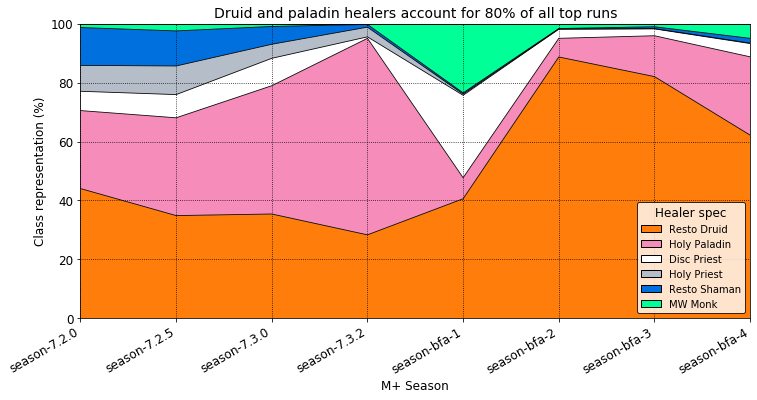

In [36]:
fig = plt.gcf()
fig.set_size_inches(12, 6.5)
plt.rc('font', size=12)
plt.rc('axes', titlesize=14)

plt.stackplot(list(range(len(hlr))),
              hlr['healer_druid'],
              hlr['healer_paladin'],
              hlr['healer_priest_discipline'],
              hlr['healer_priest_holy'],
              hlr['healer_shaman'],
              hlr['healer_monk'],
              colors = ['#FF7D0A', '#F58CBA', '#ffffff',
                        '#b5bdc9', '#0070DE', '#00FF96'])
leg = plt.legend(['Resto Druid', 'Holy Paladin', 'Disc Priest',
                  'Holy Priest', 'Resto Shaman', 'MW Monk'], title='Healer spec',
                frameon=True, edgecolor='black', ncol=1, loc='lower right', fontsize=10)
            #bbox_to_anchor=(1.2, 1))
for lh in leg.legendHandles:
    lh.set_edgecolor('black')

dfx = np.zeros(8)
for i in ['healer_druid', 'healer_paladin', 'healer_priest_discipline', 'healer_priest_holy', 'healer_shaman', 'healer_monk']:
    dfx = dfx + hlr[i].to_numpy()
    plt.plot(list(range(len(hlr))),
             dfx, color='black', lw=0.8)

plt.xticks(list(range(len(hlr))),list(hlr.index), rotation=30,
           horizontalalignment='right')
plt.yticks([0.2*i for i in range(6)], [int(100*0.2*i) for i in range(6)])

plt.title('Druid and paladin healers account for 80% of all top runs')
plt.ylabel('Class representation (%)')
plt.xlabel('M+ Season')
plt.xlim([0,len(hlr)-1])
plt.ylim([0,1])

#add grid
plt.grid(color='black', linestyle=':')
#ax = plt.gca()
#ax.yaxis.grid(True, color='black', linestyle=':')

plt.gcf().subplots_adjust(bottom=0.25)

plt.savefig('visualization/healers.jpg', dpi=300)

#### Plot tank data

In [20]:
# isolate tanks into their own DF, and convert counts into %
tanks = ['tank_' + i for i in ['druid', 'paladin', 'death_knight',
                               'demon_hunter', 'monk', 'warrior']]

tnk = gdf[tanks].div(gdf[tanks].sum(axis=1), axis=0)
tnk

,tank_druid,tank_paladin,tank_death_knight,tank_demon_hunter,tank_monk,tank_warrior
season,,,,,,
season-7.2.0,0.241703,0.195992,0.197036,0.159883,0.103527,0.101858
season-7.2.5,0.104197,0.121111,0.381290,0.249321,0.078513,0.065567
season-7.3.0,0.054346,0.191752,0.408749,0.250723,0.063981,0.030449
season-7.3.2,0.001910,0.086707,0.624141,0.267571,0.007066,0.012605
season-bfa-1,0.014169,0.051206,0.639821,0.088243,0.118071,0.088491
season-bfa-2,0.004251,0.061515,0.054264,0.004251,0.014004,0.861715
season-bfa-3,0.009750,0.047250,0.025000,0.029750,0.555250,0.333000
season-bfa-4,0.029167,0.028958,0.038958,0.126875,0.161458,0.614583


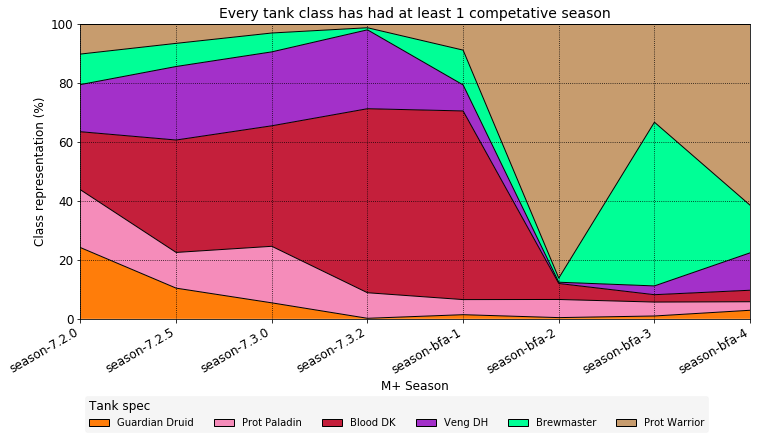

In [37]:
fig = plt.gcf()
fig.set_size_inches(12, 6.5)
plt.rc('font', size=12)
plt.rc('axes', titlesize=14)

plt.stackplot(list(range(len(tnk))),
              tnk['tank_druid'],
              tnk['tank_paladin'],
              tnk['tank_death_knight'],
              tnk['tank_demon_hunter'],
              tnk['tank_monk'],
              tnk['tank_warrior'],
              colors = ['#FF7D0A', '#F58CBA', '#C41F3B',
                        '#A330C9', '#00FF96', '#C79C6E'])

leg = plt.legend(['Guardian Druid', 'Prot Paladin', 'Blood DK',
            'Veng DH', 'Brewmaster', 'Prot Warrior'],
           fontsize=10, loc='lower left', title='Tank spec',
           ncol=6, bbox_to_anchor=(0,-0.4), frameon=True, facecolor='grey', framealpha=0.08)
leg._legend_box.align = 'left'

# edge legend patches (currently not visible)
for lh in leg.legendHandles:
    lh.set_edgecolor('black')

dfx = np.zeros(8)
for i in tanks:
    dfx = dfx + tnk[i].to_numpy()
    plt.plot(list(range(len(tnk))),
             dfx, color='black', lw=1)

plt.xticks(list(range(len(tnk))),list(tnk.index), rotation=30,
           horizontalalignment='right')
plt.yticks([0.2*i for i in range(6)], [int(100*0.2*i) for i in range(6)])

plt.title('Every tank class has had at least 1 competative season')
plt.ylabel('Class representation (%)')
plt.xlabel('M+ Season')
plt.xlim([0,len(tnk)-1])
plt.ylim([0,1])

plt.grid(color='black', linestyle=':')

plt.gcf().subplots_adjust(bottom=0.25)

plt.savefig('visualization/tanks_new.jpg', dpi=300)

#### Plot melee dps data

In [22]:
dps_melee= [
    'dps_demon_hunter',
    'dps_rogue',
    'dps_paladin',
    'dps_warrior',
    'dps_death_knight',
    'dps_monk',
    'dps_hunter_survival',
    'dps_druid_feral',
    'dps_shaman_enhancement',
    ]
dpsm = gdf[dps_melee].div(gdf[dps_melee].sum(axis=1), axis=0)
dpsm

,dps_demon_hunter,dps_rogue,dps_paladin,dps_warrior,dps_death_knight,dps_monk,dps_hunter_survival,dps_druid_feral,dps_shaman_enhancement
season,,,,,,,,,
season-7.2.0,0.277077,0.185870,0.174987,0.138884,0.128347,0.040249,0.022111,0.017101,0.015374
season-7.2.5,0.182447,0.315223,0.093554,0.270535,0.078283,0.019450,0.007073,0.016235,0.017200
season-7.3.0,0.119686,0.410235,0.070471,0.262753,0.059353,0.017659,0.006377,0.044801,0.008666
season-7.3.2,0.128471,0.222599,0.017808,0.048336,0.071232,0.507526,0.000000,0.003816,0.000212
season-bfa-1,0.408121,0.504061,0.013627,0.019683,0.009911,0.043359,0.000826,0.000413,0.000000
season-bfa-2,0.214113,0.636804,0.032745,0.008878,0.014182,0.092125,0.000000,0.000692,0.000461
season-bfa-3,0.334825,0.573464,0.004003,0.038262,0.022133,0.025194,0.000000,0.000353,0.001766
season-bfa-4,0.387642,0.462992,0.013447,0.067793,0.035897,0.013892,0.000000,0.007335,0.011002


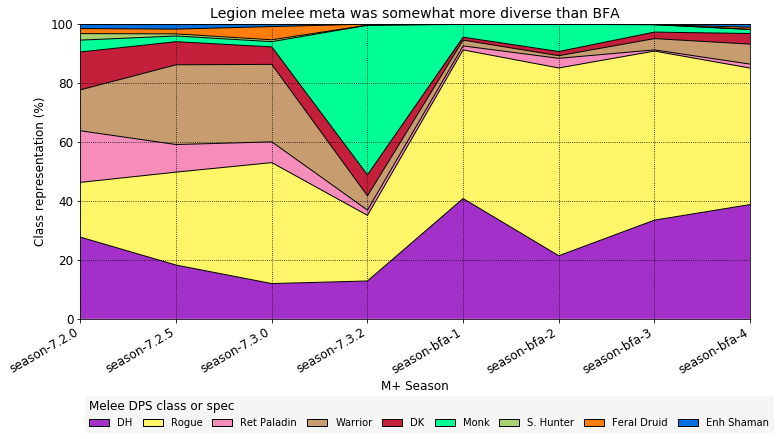

In [26]:
fig = plt.gcf()
fig.set_size_inches(12, 6.5)
plt.rc('font', size=12)
plt.rc('axes', titlesize=14)

clr = blizzcolors.BlizzColors()
plt.stackplot(list(range(len(dpsm))),
              dpsm['dps_demon_hunter'],
              dpsm['dps_rogue'],
              dpsm['dps_paladin'],
              dpsm['dps_warrior'],
              dpsm['dps_death_knight'],
              dpsm['dps_monk'],
              dpsm['dps_hunter_survival'],
              dpsm['dps_druid_feral'],
              dpsm['dps_shaman_enhancement'],
              colors = [clr.get_color('demon hunter'),
                        clr.get_color('rogue'),
                        clr.get_color('paladin'),
                        clr.get_color('warrior'),
                        clr.get_color('death knight'),
                        clr.get_color('monk'),
                        clr.get_color('hunter'),
                        clr.get_color('druid'),
                        clr.get_color('shaman')]
             )

leg = plt.legend(['DH', 'Rogue', 'Ret Paladin', 'Warrior',
    'DK', 'Monk', 'S. Hunter', 'Feral Druid', 'Enh Shaman'],
    fontsize=10, loc='lower left', title='Melee DPS class or spec',
     ncol=9, bbox_to_anchor=(0,-0.4), frameon=True, facecolor='grey',
    framealpha=0.08,
    columnspacing=1)

leg._legend_box.align = 'left'

# edge legend patches (currently not visible)
for lh in leg.legendHandles:
    lh.set_edgecolor('black')

dfx = np.zeros(8)
for i in dps_melee:
    dfx = dfx + dpsm[i].to_numpy()
    plt.plot(list(range(len(dpsm))),
              dfx, color='black', lw=1)

plt.xticks(list(range(len(dpsm))),list(dpsm.index), rotation=30,
           horizontalalignment='right')
plt.yticks([0.2*i for i in range(6)], [int(100*0.2*i) for i in range(6)])

plt.title('Legion melee meta was somewhat more diverse than BFA')
plt.ylabel('Class representation (%)')
plt.xlabel('M+ Season')
plt.xlim([0,len(tnk)-1])
plt.ylim([0,1])

plt.grid(color='black', linestyle=':')

plt.gcf().subplots_adjust(bottom=0.25)

plt.savefig('visualization/melee_dps.jpg', dpi=300)

#### Plot range dps data

In [28]:
dps_range = [
    'dps_warlock',
    'dps_druid_balance',
    'dps_hunter_mmbm',
    'dps_mage',
    'dps_priest',
    'dps_shaman_elemental'
    ]
dpsr = gdf[dps_range].div(gdf[dps_range].sum(axis=1), axis=0)
dpsr

,dps_warlock,dps_druid_balance,dps_hunter_mmbm,dps_mage,dps_priest,dps_shaman_elemental
season,,,,,,
season-7.2.0,0.253219,0.098248,0.289526,0.247767,0.051734,0.059506
season-7.2.5,0.239516,0.176550,0.255532,0.252965,0.031911,0.043526
season-7.3.0,0.356259,0.221564,0.148979,0.185589,0.020633,0.066977
season-7.3.2,0.389851,0.275259,0.125126,0.167720,0.003481,0.038564
season-bfa-1,0.114015,0.298209,0.155954,0.345627,0.024025,0.062171
season-bfa-2,0.062274,0.108002,0.312876,0.264741,0.084236,0.167870
season-bfa-3,0.014849,0.148201,0.251285,0.426613,0.083095,0.075957
season-bfa-4,0.045337,0.042006,0.361399,0.484826,0.045892,0.020540


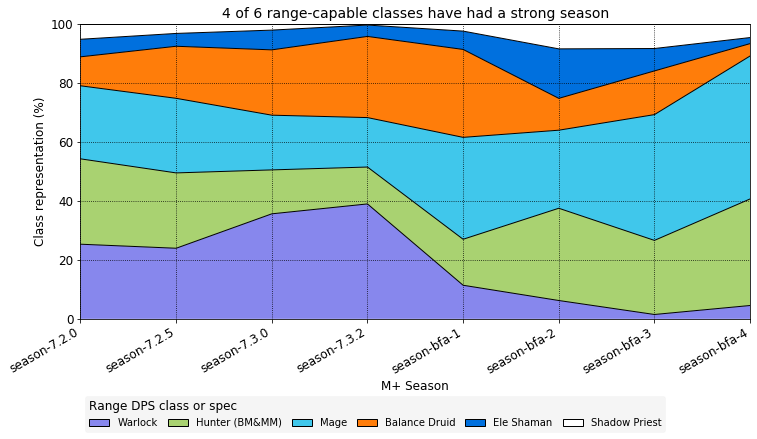

In [29]:
fig = plt.gcf()
fig.set_size_inches(12, 6.5)
plt.rc('font', size=12)
plt.rc('axes', titlesize=14)

clr = blizzcolors.BlizzColors()
plt.stackplot(list(range(len(dpsm))),
              dpsr['dps_warlock'],
              dpsr['dps_hunter_mmbm'],
              dpsr['dps_mage'],
              dpsr['dps_druid_balance'],
              dpsr['dps_shaman_elemental'],
              dpsr['dps_priest'],
              colors = [clr.get_color('warlock'),
                        clr.get_color('hunter'),
                        clr.get_color('mage'),
                        clr.get_color('druid'),
                        clr.get_color('shaman'),
                        clr.get_color('priest')]
             )

leg = plt.legend(['Warlock', 'Hunter (BM&MM)', 'Mage', 'Balance Druid',
                  'Ele Shaman', 'Shadow Priest'],
    fontsize=10, loc='lower left', title='Range DPS class or spec',
    ncol=6, bbox_to_anchor=(0,-0.4), frameon=True, facecolor='grey',
    framealpha=0.08,
    columnspacing=1)

leg._legend_box.align = 'left'

# edge legend patches (currently not visible)
for lh in leg.legendHandles:
    lh.set_edgecolor('black')

dps_range_mod = [
    'dps_warlock',
    'dps_hunter_mmbm',
    'dps_mage',
    'dps_druid_balance',
    'dps_shaman_elemental',
    'dps_priest'
    ]
dfx = np.zeros(8)
for i in dps_range_mod:
    dfx = dfx + dpsr[i].to_numpy()
    plt.plot(list(range(len(dpsr))),
              dfx, color='black', lw=1)

plt.xticks(list(range(len(dpsr))),list(dpsr.index), rotation=30,
           horizontalalignment='right')
plt.yticks([0.2*i for i in range(6)], [int(100*0.2*i) for i in range(6)])

plt.title('4 of 6 range-capable classes have had a strong season')
plt.ylabel('Class representation (%)')
plt.xlabel('M+ Season')
plt.xlim([0,len(tnk)-1])
plt.ylim([0,1])

plt.grid(color='black', linestyle=':')

plt.gcf().subplots_adjust(bottom=0.25)

plt.savefig('visualization/range_dps.jpg', dpi=300)

#### Plot range vs melee ratio

In [30]:
num_melee = gdf[dps_melee].sum(axis=1)
num_range = gdf[dps_range].sum(axis=1)

ratio = num_melee/(num_melee + num_range)
ratio

season
season-7.2.0    0.401735
season-7.2.5    0.432014
season-7.3.0    0.392882
season-7.3.2    0.301714
season-bfa-1    0.604913
season-bfa-2    0.722931
season-bfa-3    0.708069
season-bfa-4    0.624774
dtype: float64

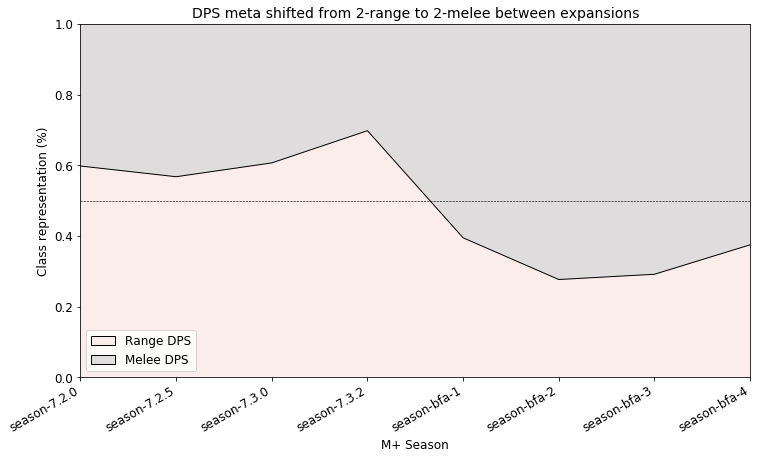

In [31]:
fig = plt.gcf()
fig.set_size_inches(12, 6.5)
plt.rc('font', size=12)
plt.rc('axes', titlesize=14)

plt.stackplot(list(range(len(ratio))),
              [1-ratio, ratio],
              colors=['#fceded', '#dedcdc'])

leg = plt.legend(['Range DPS', 'Melee DPS'], loc='lower left', fontsize=12)

for lh in leg.legendHandles:
    lh.set_edgecolor('black')


plt.plot(list(range(len(ratio))), 1-ratio, color='black', lw=1)
plt.plot([0, 8], [0.5, 0.5], '--', color='black', lw=0.6)

plt.xlim([0,len(ratio)-1])
plt.ylim([0,1])

plt.xticks(list(range(len(ratio))),list(ratio.index), rotation=30,
           horizontalalignment='right')


plt.title('DPS meta shifted from 2-range to 2-melee between expansions')
plt.ylabel('Class representation (%)')
plt.xlabel('M+ Season')


plt.savefig('visualization/melee_vs_range.jpg', dpi=300)

#### Calculate spec weight relative to random expected frequency

In [32]:
# note: should probably do this with a groupby
def get_representation_ratio(df, cols):
    return df[cols].div(df[cols].sum(axis=1)*(1/len(cols)), axis=0).T

rep_ratio = None
rep_ratio = get_representation_ratio(gdf, healers)
rep_ratio = pd.concat([rep_ratio, get_representation_ratio(gdf, tanks)])
rep_ratio = pd.concat([rep_ratio, get_representation_ratio(gdf, dps_melee)])
rep_ratio = pd.concat([rep_ratio, get_representation_ratio(gdf, dps_range)])

In [33]:
rep_ratio = rep_ratio.round(2)
rep_ratio['rr_mean'] = rep_ratio[seasons].sum(axis=1)/8
rep_ratio['rr>=1'] = (rep_ratio[seasons].round(1) >= 1).sum(axis=1)
rep_ratio['rr>=2'] = (rep_ratio[seasons].round(1) >= 2).sum(axis=1)

rep_ratio.sort_values(['rr_mean'], ascending=False, inplace=True)

In [34]:
rep_ratio.to_csv('results/rep_ratios.csv')
rep_ratio

season,season-7.2.0,season-7.2.5,season-7.3.0,season-7.3.2,season-bfa-1,season-bfa-2,season-bfa-3,season-bfa-4,rr_mean,rr>=1,rr>=2
dps_rogue,1.67,2.84,3.69,2.00,4.54,5.73,5.16,4.17,3.72500,8,7
healer_druid,2.64,2.09,2.12,1.70,2.44,5.32,4.92,3.73,3.12000,8,7
dps_demon_hunter,2.49,1.64,1.08,1.16,3.67,1.93,3.01,3.49,2.30875,8,4
dps_mage,1.49,1.52,1.11,1.01,2.07,1.59,2.56,2.91,1.78250,8,3
tank_death_knight,1.18,2.29,2.45,3.74,3.84,0.33,0.15,0.23,1.77625,5,4
healer_paladin,1.59,1.99,2.61,4.00,0.43,0.38,0.83,1.59,1.67750,5,3
tank_warrior,0.61,0.39,0.18,0.08,0.53,5.17,2.00,3.69,1.58125,3,3
dps_hunter_mmbm,1.74,1.53,0.89,0.75,0.94,1.88,1.51,2.17,1.42625,5,1
dps_warlock,1.52,1.44,2.14,2.34,0.68,0.37,0.09,0.27,1.10625,4,2
dps_druid_balance,0.59,1.06,1.33,1.65,1.79,0.65,0.89,0.25,1.02625,4,0


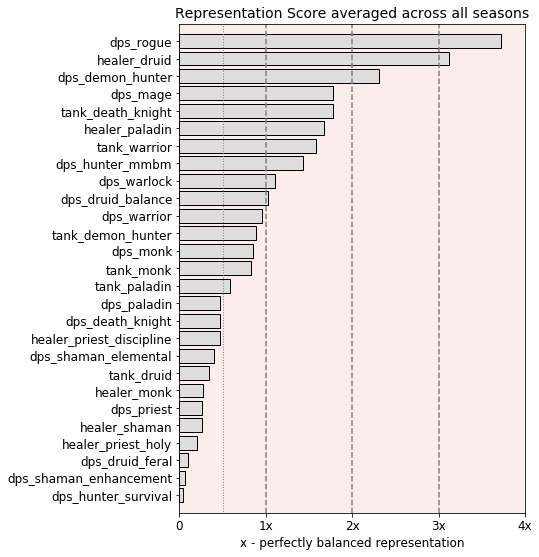

In [35]:
fig=plt.figure(figsize=(8,9))
ax = plt.gca()
ax.set_facecolor('#fceded')
plt.rc('font', size=12)
plt.rc('axes', titlesize=14)

plt.barh(rep_ratio.index, rep_ratio['rr_mean'], color='#dedcdc', edgecolor='black')
plt.plot([1, 1], [-3,30], '--', color='grey')
plt.plot([2, 2], [-3,30], '--', color='grey')
plt.plot([3, 3], [-3,30], '--', color='grey')
plt.plot([0.5, 0.5], [-3,30], ':', color='grey', lw=1)

plt.ylim([27, -1])
plt.xticks([0,1,2,3,4], ['0','1x','2x','3x','4x'])

plt.xlabel('x - perfectly balanced representation')
plt.title('Representation Score averaged across all seasons')

plt.gcf().subplots_adjust(left=0.3)

plt.savefig('visualization/rep_multiple.jpg', dpi=300)